In [70]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 15, 6
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [39]:
data = pd.read_csv("data.txt", delimiter=":", names=['date', 'count'], squeeze=True)

In [40]:
data.head()

,date,count
0,20130214002304,28061
1,20130216031420,28108
2,20130218203937,28177
3,20130219041156,28186
4,20130509061502,30742


In [41]:
print(data.dtypes)

date     int64
count    int64
dtype: object


In [42]:
data['date'] = data.date.astype(str)

In [43]:
data['date'] = pd.to_datetime(data['date'])

In [44]:
data.head()

,date,count
0,2013-02-14 00:23:04,28061
1,2013-02-16 03:14:20,28108
2,2013-02-18 20:39:37,28177
3,2013-02-19 04:11:56,28186
4,2013-05-09 06:15:02,30742


In [45]:
data.index = data['date']
del data['date']
data.head()

,count
date,
2013-02-14 00:23:04,28061
2013-02-16 03:14:20,28108
2013-02-18 20:39:37,28177
2013-02-19 04:11:56,28186
2013-05-09 06:15:02,30742


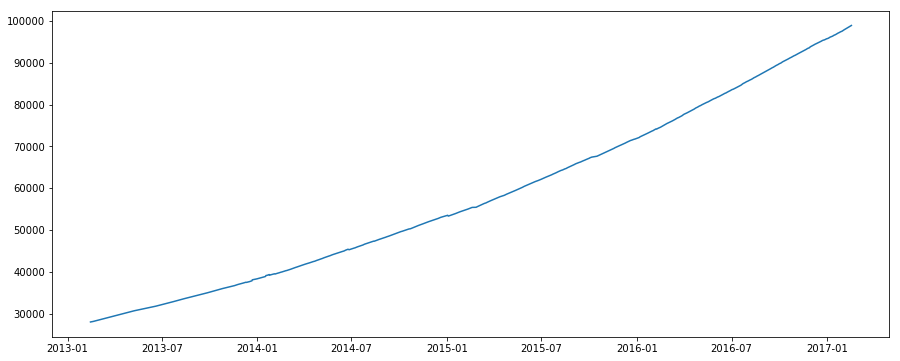

In [46]:
plt.plot(data)

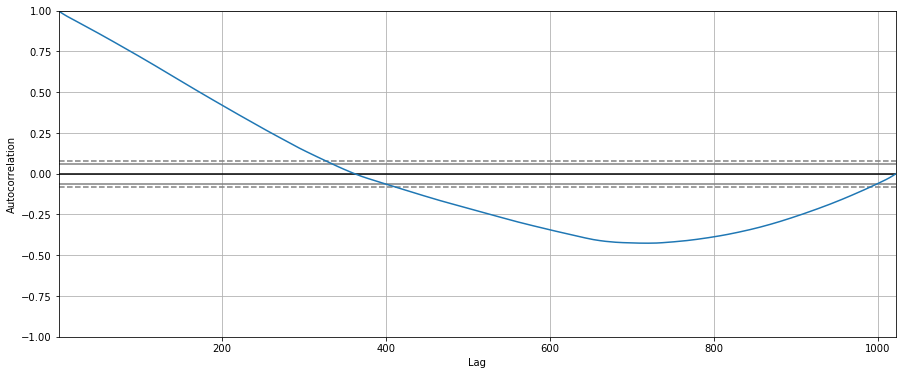

In [10]:
autocorrelation_plot(data)
pyplot.show()

In [47]:
data['count'] = data['count'].astype(float)

In [12]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                 1021
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6324.978
Method:                       css-mle   S.D. of innovations            118.585
Date:                Tue, 12 Dec 2017   AIC                          12663.956
Time:                        16:20:47   BIC                          12698.455
Sample:                    02-16-2013   HQIC                         12677.055
                         - 02-16-2017                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            73.5078     12.641      5.815      0.000        48.731    98.284
ar.L1.D.count     0.2059      0.032      6.527      0.000         0.144     0.268
ar.L2.D.count     0.0460      0.032     

In [32]:
forecast = model_fit.forecast()[0]

In [33]:
print(forecast)

[ 99012.1268398]


In [63]:
upsampled = data.resample('5T').mean()

In [64]:
interpolated = upsampled.interpolate(method='linear')

In [65]:
interpolated.head()

,count
date,
2013-02-14 00:20:00,28061.000000
2013-02-14 00:25:00,28061.077049
2013-02-14 00:30:00,28061.154098
2013-02-14 00:35:00,28061.231148
2013-02-14 00:40:00,28061.308197


In [66]:
model = ARIMA(interpolated, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:               421492
Model:                 ARIMA(5, 1, 0)   Log Likelihood             1436833.148
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 13 Dec 2017   AIC                       -2873652.295
Time:                        21:48:46   BIC                       -2873575.634
Sample:                    02-14-2013   HQIC                      -2873630.438
                         - 02-16-2017                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.1681      0.003     59.535      0.000         0.163     0.174
ar.L1.D.count     0.9977      0.002    648.121      0.000         0.995     1.001
ar.L2.D.count    -0.1905      0.002    -

In [73]:
model = AR(interpolated)
model_fit = model.fit()

In [76]:
window = model_fit.k_ar
coef = model_fit.params


In [78]:
history = interpolated[len(interpolated)-window:]

In [91]:
history.head()

,count
date,
2017-02-16 04:40:00,98879.666667
2017-02-16 04:45:00,98879.951389
2017-02-16 04:50:00,98880.236111
2017-02-16 04:55:00,98880.520833
2017-02-16 05:00:00,98880.805556
